# Data Visualization of £ to € Exchange Rates
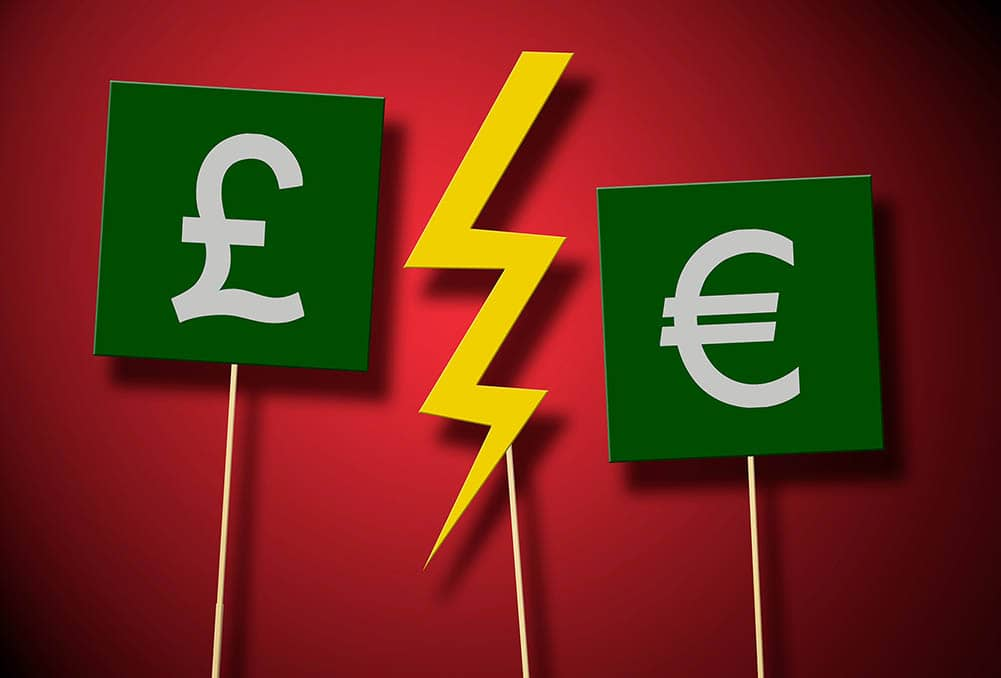

## Introduction

During this project we will be applying both exploratory data visualization (graphs used for ourselves to better understand and explore data) as well as explanatory data visualization(creating graphs for others to inform, make a point, or tell a story) techniques.

In particular we will attempt to maximize the data-ink ratio, create visual patterns with Gestalt principles and use pre-attentive attributes. We will be working with Matplotlib library and specifically with built-in FiveThirtyEight style. 

The dataset we are using contains Euro daily exchange rates between 1999 and 2022.  Reference rates are euro foreign exchange rates observed on major foreign exchange trading venues at a certain point in time = they are the price of one currency in terms of another currency. The rates are usually updated around 16:00 CET on every working day, except on __[TARGET closing days](https://www.ecb.europa.eu/services/contacts/working-hours/html/index.en.html)__.

All data provided by European Central Bank __[Statistical Data WareHouse, EXR - Exchange Rates](https://sdw.ecb.europa.eu/browseExplanation.do?node=1495)__.
The dataset is also available on __[Kaggle](https://www.kaggle.com/datasets/lsind18/euro-exchange-daily-rates-19992020)__ where it gets regularly updated. 

The focus of this project will be the exchange rate between the __[Euro(EUR)](https://en.wikipedia.org/wiki/Euro)__ and the __[British Pound Sterling (GBP)](https://en.wikipedia.org/wiki/Pound_sterling)__. We will visualize GBP-EUR rates during the 2007-2008 global financial crisis and during the 2016 Brexit referendum.  We will also show comparatively how GBP-EUR rate changed under three recent UK prime ministers: David Cameron (2010-2016), Theresa May (2016-2019) and Boris Johnson (2019-2022).

### 1. Initial analysis of the dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
import matplotlib.ticker as ticker
import matplotlib.dates as mdates

In [2]:
%load_ext autoreload
%autoreload 1

In [3]:
# Reading in the data and inspecting first and last rows of it.
fx_rates = pd.read_csv('euro-daily-hist_1999_2022.csv')
display(fx_rates.head())
fx_rates.tail()

,Period\Unit:,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
0,2023-01-27,1.5289,1.9558,5.5104,1.4479,1.0017,7.3690,NaN,23.826,7.4378,...,4.8965,NaN,11.2108,1.4277,NaN,NaN,35.7020,20.4365,1.0865,18.7185
1,2023-01-26,1.5308,1.9558,5.5572,1.4568,1.0002,7.3893,NaN,23.818,7.4383,...,4.8818,NaN,11.1763,1.4292,NaN,NaN,35.6870,20.4961,1.0895,18.6127
2,2023-01-25,1.5360,1.9558,5.5690,1.4544,1.0020,7.3778,NaN,23.808,7.4381,...,4.9035,NaN,11.1335,1.4307,NaN,NaN,35.7180,20.4658,1.0878,18.6745
3,2023-01-24,1.5470,1.9558,5.6164,1.4517,1.0053,7.3642,NaN,23.874,7.4399,...,4.9171,NaN,11.0995,1.4337,NaN,NaN,35.6090,20.4234,1.0858,18.7687
4,2023-01-23,1.5529,1.9558,5.6372,1.4523,1.0013,7.3730,NaN,23.881,7.4393,...,4.9202,NaN,11.1183,1.4328,NaN,NaN,35.6300,20.4478,1.0871,18.6597


,Period\Unit:,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
6224,1999-01-08,1.8406,NaN,NaN,1.7643,1.6138,NaN,0.58187,34.938,7.4433,...,1.3143,27.2075,9.1650,1.9537,188.8400,42.560,42.5590,0.3718,1.1659,6.7855
6225,1999-01-07,1.8474,NaN,NaN,1.7602,1.6165,NaN,0.58187,34.886,7.4431,...,1.3092,26.9876,9.1800,1.9436,188.8000,42.765,42.1678,0.3701,1.1632,6.8283
6226,1999-01-06,1.8820,NaN,NaN,1.7711,1.6116,NaN,0.58200,34.850,7.4452,...,1.3168,27.4315,9.3050,1.9699,188.7000,42.778,42.6949,0.3722,1.1743,6.7307
6227,1999-01-05,1.8944,NaN,NaN,1.7965,1.6123,NaN,0.58230,34.917,7.4495,...,1.3168,26.5876,9.4025,1.9655,188.7750,42.848,42.5048,0.3728,1.1790,6.7975
6228,1999-01-04,1.9100,NaN,NaN,1.8004,1.6168,NaN,0.58231,35.107,7.4501,...,1.3111,25.2875,9.4696,1.9554,189.0450,42.991,42.6799,0.3723,1.1789,6.9358


In [4]:
fx_rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6229 entries, 0 to 6228
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Period\Unit:              6229 non-null   object 
 1   [Australian dollar ]      6229 non-null   object 
 2   [Bulgarian lev ]          5827 non-null   object 
 3   [Brazilian real ]         5961 non-null   object 
 4   [Canadian dollar ]        6229 non-null   object 
 5   [Swiss franc ]            6229 non-null   object 
 6   [Chinese yuan renminbi ]  5961 non-null   object 
 7   [Cypriot pound ]          2346 non-null   object 
 8   [Czech koruna ]           6229 non-null   object 
 9   [Danish krone ]           6229 non-null   object 
 10  [Estonian kroon ]         3130 non-null   object 
 11  [UK pound sterling ]      6229 non-null   object 
 12  [Greek drachma ]          520 non-null    object 
 13  [Hong Kong dollar ]       6229 non-null   object 
 14  [Croatia

In [5]:
# Renaming columns to something more practical
fx_rates.rename(columns={'[UK pound sterling ]':'GBP','Period\\Unit:':'Time'}, inplace = True)

In [6]:
fx_rates['Time'] = pd.to_datetime(fx_rates['Time']) # changing Time column to datetime format
fx_rates.sort_values('Time', inplace = True) # sorting values by time in ascending order
fx_rates.reset_index(drop=True, inplace = True) # dropping the initial index 

In [7]:
euro_gbp =  fx_rates[['Time', 'GBP']].copy()
euro_gbp['GBP'].value_counts()

-          62
0.84560     8
0.67930     7
0.87750     7
0.90430     7
           ..
0.84250     1
0.84584     1
0.86740     1
0.86990     1
0.88248     1
Name: GBP, Length: 3752, dtype: int64

There are 62 value of '-' character, let's drop them as we do not require them for our analysis. 

In [8]:
euro_gbp = euro_gbp[euro_gbp['GBP'] != '-']
euro_gbp['GBP'] = euro_gbp['GBP'].astype(float)

### 2. Exploratory data visualization.
Now let’s generate a line plot to visualize the evolution of GBP-EUR exchange rate.

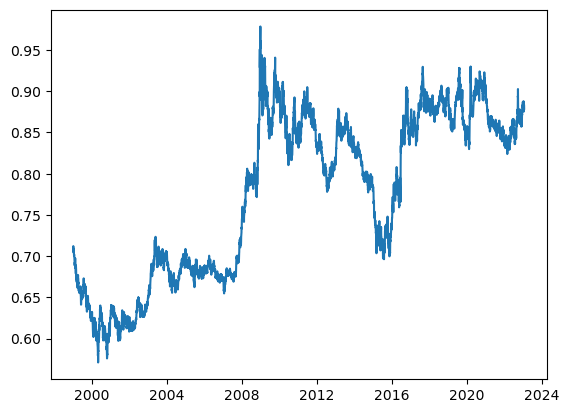

In [9]:
plt.plot(euro_gbp['Time'],euro_gbp['GBP'])
plt.show()

The plot above displays the evolution of Euro to Pound Sterling rate. For the purpose of this project what we actually need is a reverse – GBP-EUR. We can achieve this by dividing 1 by the rate itself.

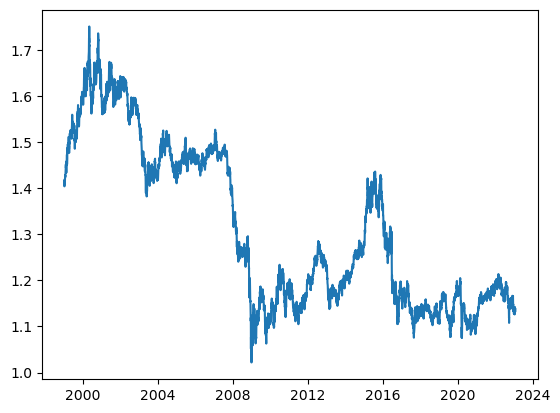

In [10]:
plt.plot(euro_gbp['Time'],1/euro_gbp['GBP'])
plt.show()

The graph appears very choppy, because it displays daily variation in exchange rates. We need to see long-term trend rather than daily variation. For this purpose, we can use the rolling mean (moving average). The number of days used in moving average calculations is called the rolling window (or moving window).

In order to visually inspect various rolling windows let us compare original graph with 7, 30, 50, 100 and 365 rolling window days. 

To improve  visual comparison of the graphs, we should remove irrelevant information from the axes and maximize data-ink ratio.

__[Edward Tufte](https://www.edwardtufte.com/tufte/)__ theorized the principle of maximizing data elements in his book __[‘The Visual Display of Quantitative Information’ (1983)](https://www.edwardtufte.com/tufte/books_vdqi)__. From the total amount of ink used for printing a graph, some of the ink goes to show the data — that is the data-ink. Tufte named the principle of maximizing data elements as maximizing the data-ink ratio. 

We should try to maximize the data-ink ratio within reason. Some structural elements are necessary, otherwise, the graph can become unreadable. Decorations are optional by definition, but they can help prove a point in some cases.

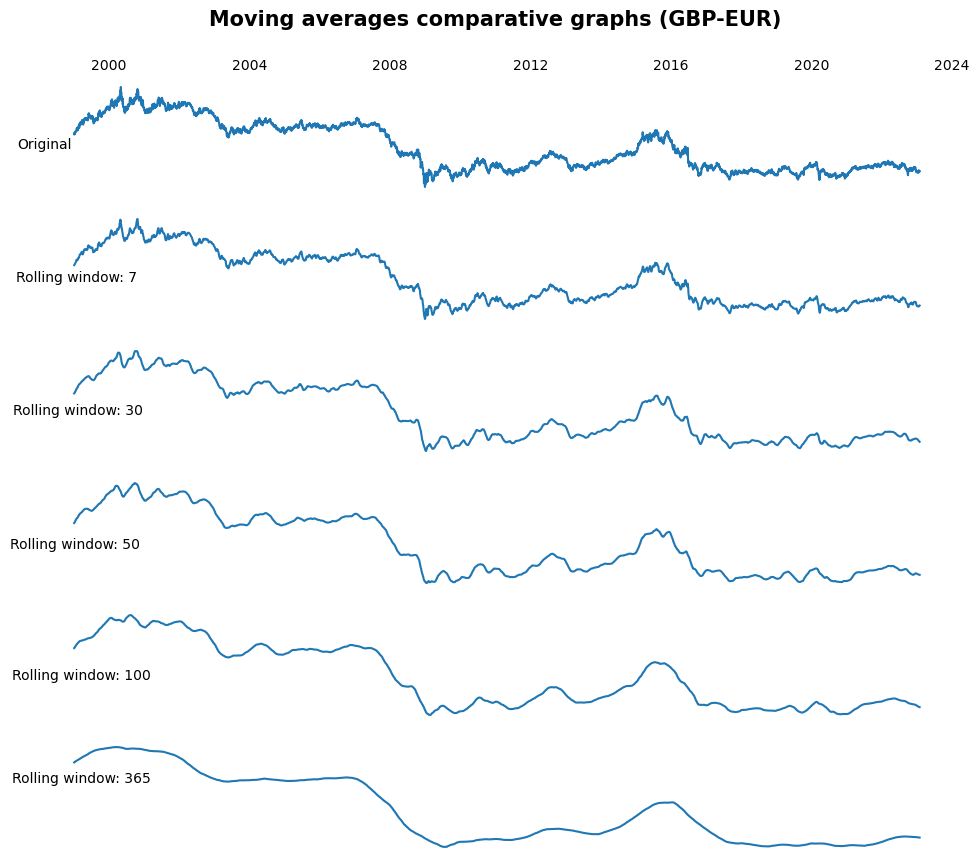

In [11]:
style.use('default')
fig,(ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(figsize=(12,10), nrows = 6, ncols = 1)

ax1.plot(euro_gbp['Time'],1/euro_gbp['GBP'])
ax1.set_yticklabels([])
ax1.xaxis.tick_top()  # Move ticks to the top of the axes
ax1.tick_params(top=0, left=0) 
for location in ['left', 'right', 'top', 'bottom']:
        ax1.spines[location].set_visible(False)
        
axes = [ax2, ax3, ax4, ax5, ax6]
for ax, rolling_mean in zip(axes, [7,30,50,100,365]):
    ax.plot(euro_gbp['Time'],1/euro_gbp['GBP'].rolling(rolling_mean).mean())
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    ax.tick_params(bottom=0, left=0) 
    for location in ['left', 'right', 'top', 'bottom']:
        ax.spines[location].set_visible(False)

ax1.text(12000, 2.2,'Moving averages comparative graphs (GBP-EUR)', weight ='bold', fontsize =15)
ax1.text(10000,1.3,'Original')
ax2.text(10000,1.3,'Rolling window: 7')
ax3.text(10000,1.3,'Rolling window: 30')
ax4.text(10000,1.3,'Rolling window: 50')
ax5.text(10100,1.3,'Rolling window: 100')
ax6.text(10500,1.45,'Rolling window: 365')

plt.show()

30 day moving average seems to be like a reasonable choice for the purpose of this project. It is clearly displaying long term trend along with peaks and troughs of daily variations. The 30 day moving average is also a popular short-term technical indicator used in foreign exchange (Forex or FX) analysis. 

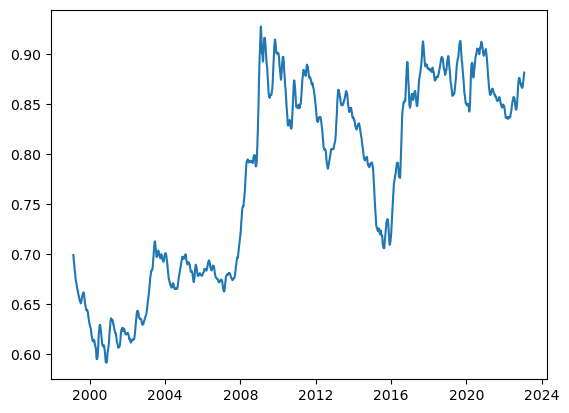

In [12]:
euro_gbp['rolling_mean_30'] = euro_gbp['GBP'].rolling(30).mean()
plt.plot(euro_gbp['Time'], euro_gbp['rolling_mean_30'])
plt.show()

### 3. Explanatory data visualization.
#### Global financial crisis
Below we will work with the GBP-EUR rates during the __[global financial crisis](https://en.wikipedia.org/wiki/2007%E2%80%932008_financial_crisis)__. 


In [13]:
financial_crisis = euro_gbp.copy()[
    (euro_gbp['Time'].dt.year >= 2006)&
    (euro_gbp['Time'].dt.year <= 2009)
]
financial_crisis_detail = euro_gbp.copy()[
    (euro_gbp['Time'].dt.year >= 2007)&
    (euro_gbp['Time'].dt.year <= 2008)
]

To help viewers distinguish most relevant information on a graph, we should apply Gestalt principles, in particular principles of <u>enclosure</u> and <u>similarity</u>. The idea behind Gestalt principles is that humans generally perceive patterns rather than individual objects.

In our case, red lines on the graphs will act as pre-attentive attributes and shift viewer’s attention to the most relevant objects displayed. 


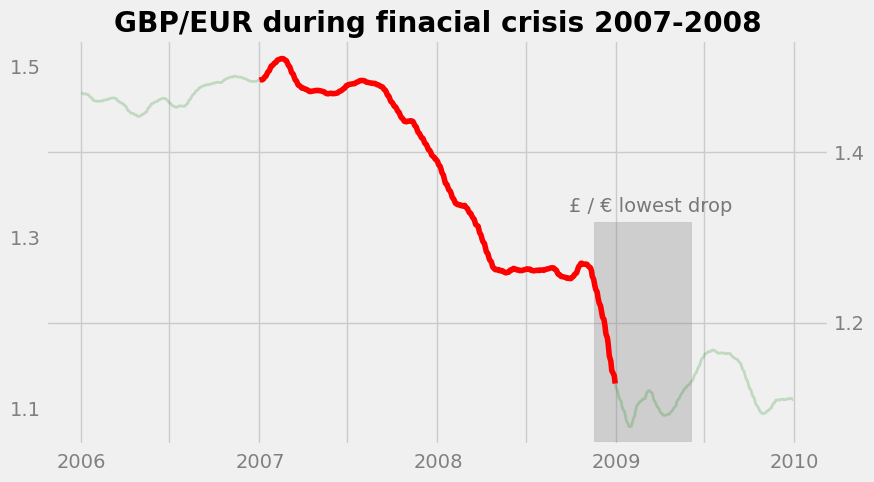

In [14]:
style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(9, 5))
ax.plot(financial_crisis['Time'], 1/financial_crisis['rolling_mean_30'], alpha=0.2,color='green', linewidth=2)
ax.plot(financial_crisis_detail['Time'], 1/financial_crisis_detail['rolling_mean_30'],color='red', linewidth=4)

ax.set_xticklabels([])
x = 13100
for year in ['2006','2007','2008','2009','2010']:
    ax.text(x, 1.03, year, color = 'grey')
    x += 365

plt.title('GBP/EUR during finacial crisis 2007-2008', weight ='bold')
ax.text(s= '£ / € lowest drop', x=14150, y=1.33, alpha = 0.5)

ax.axvspan(xmin=14200, xmax=14400, ymin=0.01, ymax = 0.55,alpha=0.3, color='grey') #vertical line 

ax.yaxis.tick_right() # setting y axis to the right hand side
ax.set_yticks([1.2, 1.4])
ax.tick_params(axis ='y', colors = 'grey')

secax = ax.secondary_yaxis('left') # creating secondary y axis
secax.set_yticks([1.1, 1.3, 1.5])
secax.tick_params(axis = 'y', colors = 'grey')

plt.show()

#### Brexit 
Now we should visualize GBP-EUR rates during the __[Brexit](https://en.wikipedia.org/wiki/Brexit)__ referendum in UK (2016) applying the same principles as above.  

In [15]:
brexit = euro_gbp.copy()[
    (euro_gbp['Time'].dt.year >= 2016)&
    (euro_gbp['Time'].dt.year <= 2016)
]
brexit_overall = euro_gbp.copy()[
    (euro_gbp['Time'].dt.year >= 2015)&
    (euro_gbp['Time'].dt.year <= 2020)
]

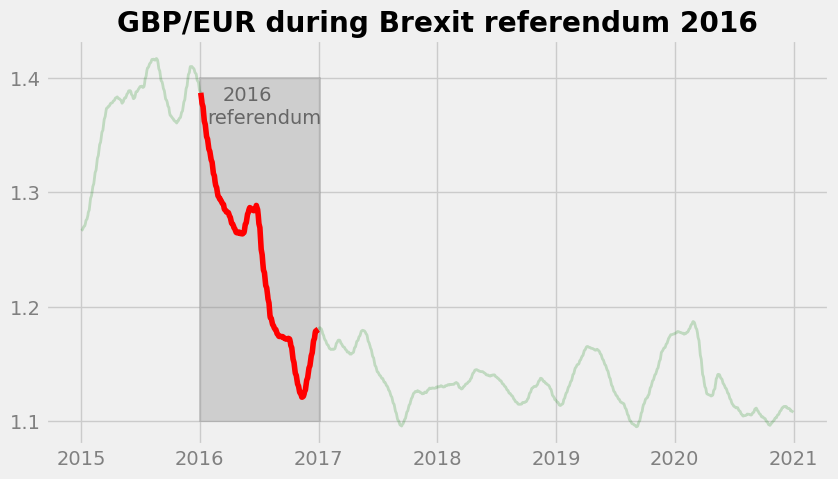

In [16]:
fig, ax = plt.subplots(figsize=(9, 5))
ax.plot(brexit_overall['Time'], 1/brexit_overall['rolling_mean_30'], alpha=0.2,color='green', linewidth=2)
ax.plot(brexit['Time'], 1/brexit['rolling_mean_30'],color='red', linewidth=4)

plt.title('GBP/EUR during Brexit referendum 2016', weight ='bold')

ax.axvspan(xmin=16800, xmax=17170, ymin=0.06, ymax = 0.91,alpha=0.3, color='grey')
ax.text(s= '2016', x=16870, y=1.38, alpha = 0.5)
ax.text(s= 'referendum', x=16825, y=1.36, alpha = 0.5)

ax.tick_params(axis ='x', colors = 'grey')
ax.tick_params(axis ='y', colors = 'grey')
ax.set_yticks([1.1, 1.2, 1.3, 1.4])

plt.show()

#### GBP-EUR rate under three UK prime ministers: David Cameron (2010-2016), Theresa May (2016-2019) and Boris Johnson (2019-2022).

In [17]:
euro_gbp.set_index('Time', inplace=True, drop =False) # setting 'Time' column as index
From = '2010-05-11'
To   = '2022-09-06'
cameron_may_johnson = euro_gbp.loc[From:To,:] # slicing based on this index
cameron_may_johnson # examining results

,Time,GBP,rolling_mean_30
Time,,,
2010-05-11,2010-05-11,0.85960,0.873153
2010-05-12,2010-05-12,0.84940,0.871487
2010-05-13,2010-05-13,0.85300,0.870143
2010-05-14,2010-05-14,0.85710,0.869053
2010-05-17,2010-05-17,0.85540,0.868072
...,...,...,...
2022-08-31,2022-08-31,0.86035,0.845081
2022-09-01,2022-09-01,0.86473,0.845391
2022-09-02,2022-09-02,0.86478,0.845836


In [18]:
From = '2010-05-11'
To   = '2016-07-13'
cameron = cameron_may_johnson.loc[From:To,:]
cameron # verifying results

,Time,GBP,rolling_mean_30
Time,,,
2010-05-11,2010-05-11,0.85960,0.873153
2010-05-12,2010-05-12,0.84940,0.871487
2010-05-13,2010-05-13,0.85300,0.870143
2010-05-14,2010-05-14,0.85710,0.869053
2010-05-17,2010-05-17,0.85540,0.868072
...,...,...,...
2016-07-07,2016-07-07,0.85085,0.796919
2016-07-08,2016-07-08,0.85243,0.799919
2016-07-11,2016-07-11,0.85097,0.802909


In [19]:
From = '2016-07-14'
To   = '2019-07-24'
may = cameron_may_johnson.loc[From:To,:]
may # 

,Time,GBP,rolling_mean_30
Time,,,
2016-07-14,2016-07-14,0.83311,0.809611
2016-07-15,2016-07-15,0.83275,0.811608
2016-07-18,2016-07-18,0.83372,0.813159
2016-07-19,2016-07-19,0.83950,0.815182
2016-07-20,2016-07-20,0.83605,0.817034
...,...,...,...
2019-07-18,2019-07-18,0.89853,0.895126
2019-07-19,2019-07-19,0.89635,0.895446
2019-07-22,2019-07-22,0.89968,0.895686


In [20]:
From = '2019-07-25'
To   = '2022-09-06'
johnson = cameron_may_johnson.loc[From:To,:]
johnson

,Time,GBP,rolling_mean_30
Time,,,
2019-07-25,2019-07-25,0.88963,0.896052
2019-07-26,2019-07-26,0.89633,0.896232
2019-07-29,2019-07-29,0.90443,0.896643
2019-07-30,2019-07-30,0.91653,0.897393
2019-07-31,2019-07-31,0.91623,0.898261
...,...,...,...
2022-08-31,2022-08-31,0.86035,0.845081
2022-09-01,2022-09-01,0.86473,0.845391
2022-09-02,2022-09-02,0.86478,0.845836


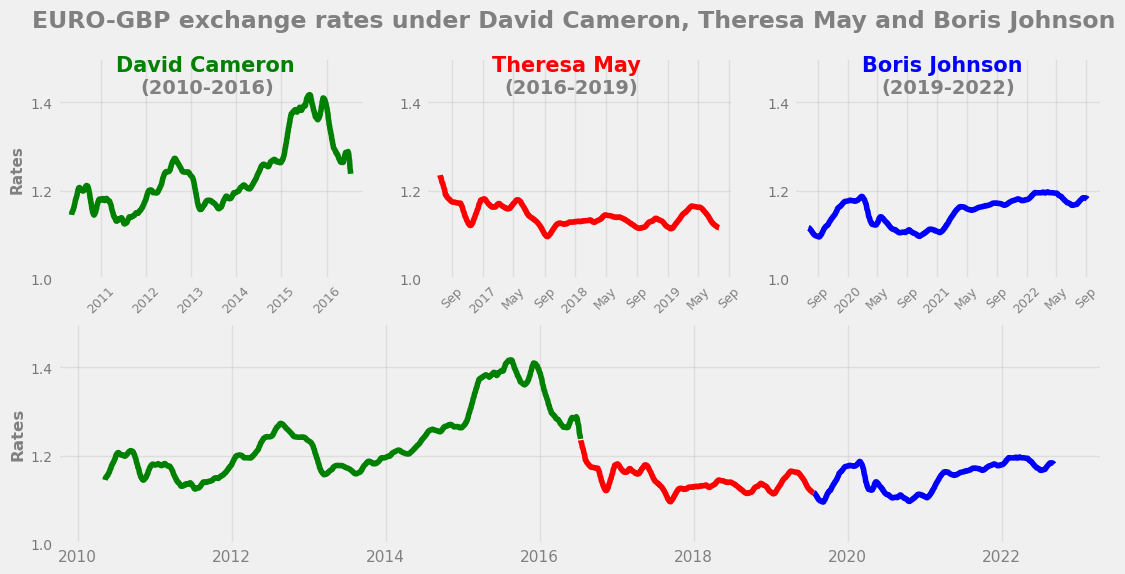

In [21]:
style.use('fivethirtyeight')

plt.subplots(figsize=(12,6))

ax1 = plt.subplot(2,3,1)
ax2 = plt.subplot(2,3,2)
ax3 = plt.subplot(2,3,3)
ax4 = plt.subplot(2,1,2)
axes = [ax1,ax2, ax3, ax4]
for ax in axes:
    ax.set_ylim(1, 1.5)
    ax.set_yticks([1.0, 1.2, 1.4])
    ax.set_yticklabels(['1.0', '1.2','1.4'], alpha=0.5, fontsize = 10)
    
    ax.grid(alpha=0.5)    
    
ax1.plot(cameron['Time'], 1/cameron['rolling_mean_30'],color='green')
ax1.tick_params(axis = 'x', labelrotation = 45, labelsize = 9, labelcolor = 'grey')
ax1.text(15100, 1.47, 'David Cameron', fontsize=15, weight='bold', color='green')
ax1.text(15300, 1.42, '(2010-2016)', fontsize=14, weight='bold', color='grey')  
ax1.text(14420, 1.57,'EURO-GBP exchange rates under David Cameron, Theresa May and Boris Johnson', 
         fontsize=17, weight='bold', color='grey')
ax1.set_ylabel('Rates', color = 'grey', fontsize = 11, weight = 'bold')

ax2.plot(may['Time'], 1/may['rolling_mean_30'], color='red')
ax2.xaxis.set_major_formatter(mdates.ConciseDateFormatter(ax2.xaxis.get_major_locator()))  
ax2.tick_params(axis = 'x', labelrotation = 45, labelsize = 9, labelcolor = 'grey')
ax2.text(17200, 1.47, 'Theresa May', fontsize=15, weight='bold', color='red')
ax2.text(17250, 1.42, '(2016-2019)', fontsize=14, weight='bold', color='grey') 

ax3.plot(johnson['Time'], 1/johnson['rolling_mean_30'], color = 'blue')
ax3.xaxis.set_major_formatter(mdates.ConciseDateFormatter(ax3.xaxis.get_major_locator()))  
ax3.tick_params(axis = 'x', labelrotation = 45, labelsize = 9, labelcolor = 'grey')
ax3.text(18320, 1.47, 'Boris Johnson', fontsize=15, weight='bold', color='blue')
ax3.text(18400, 1.42, '(2019-2022)', fontsize=14, weight='bold', color='grey')  

ax4.plot(cameron['Time'], 1/cameron['rolling_mean_30'], color='green')
ax4.plot(may['Time'], 1/may['rolling_mean_30'], color='red')
ax4.plot(johnson['Time'], 1/johnson['rolling_mean_30'], color='blue')
ax4.tick_params(axis = 'x', labelsize = 11, labelcolor = 'grey')
ax4.set_ylabel('Rates', color = 'grey', fontsize = 12, weight = 'bold')

plt.show()        

## Conclusion

In this project we concentrated on applying exploratory and explanatory technics in Matplotlib library. We have managed to explore, clean and visualize data using these technics. 

We have applied Gestalt principles guiding viewers to the most relevant parts of the data. We have used pre-attentive attributes on the graphs and maximized data-ink ratio to improve visual comparison. 